In [66]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from scipy.interpolate import make_interp_spline, BSpline

Content
Attributes

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month
Target
Need to perform clustering to summarize customer segments.

In [67]:
data = pd.read_csv('marketing_campaign.csv',sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [68]:
data.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

COISAS FEITAS NO DATASET
 A coluna ID vai ser removida por ser inutil, 
 Z_revenue só possui um valor unico (11), 
 Z_CostContact só possui um valor unico(3)
 Year_birth foi utilizada para cirar a coluna AGE, e com isso foi dropada
 

In [69]:
print(data['Z_CostContact'].unique()) #columns to drop Z_CostContact, Z_Revenue, ID
print(data['Z_Revenue'].unique())

[3]
[11]


In [70]:
data['Age'] = 2021 - data.Year_Birth 
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,40


In [71]:
#sns.pairplot(data)

<AxesSubplot:xlabel='Income', ylabel='Count'>

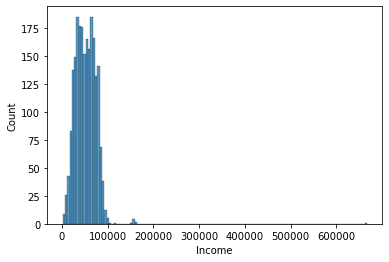

In [72]:
sns.histplot(data['Income'])

<AxesSubplot:xlabel='Income'>

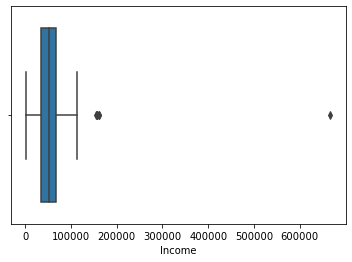

In [73]:
sns.boxplot(x=data['Income'])

In [74]:
Q1=data['Income'].quantile(0.25)
Q3=data['Income'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
data = data[data['Income']< Upper_Whisker]

35303.0
68522.0
33219.0
-14525.5 118350.5


<AxesSubplot:xlabel='Income'>

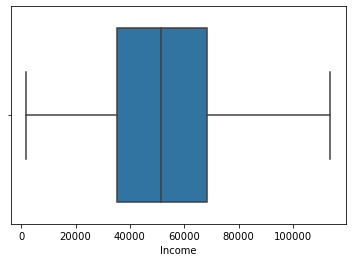

In [75]:
sns.boxplot(x=data['Income'])

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2208 non-null   int64  
 1   Year_Birth           2208 non-null   int64  
 2   Education            2208 non-null   object 
 3   Marital_Status       2208 non-null   object 
 4   Income               2208 non-null   float64
 5   Kidhome              2208 non-null   int64  
 6   Teenhome             2208 non-null   int64  
 7   Dt_Customer          2208 non-null   object 
 8   Recency              2208 non-null   int64  
 9   MntWines             2208 non-null   int64  
 10  MntFruits            2208 non-null   int64  
 11  MntMeatProducts      2208 non-null   int64  
 12  MntFishProducts      2208 non-null   int64  
 13  MntSweetProducts     2208 non-null   int64  
 14  MntGoldProds         2208 non-null   int64  
 15  NumDealsPurchases    2208 non-null   i

In [77]:
data = data.drop(['Z_CostContact','Z_Revenue'], axis=1)
data.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,67


<AxesSubplot:xlabel='Education', ylabel='Count'>

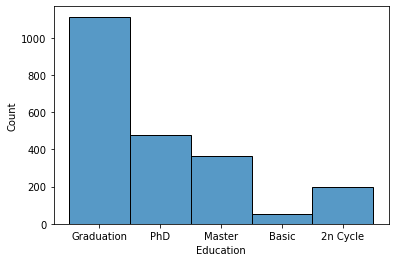

In [78]:
sns.histplot(data['Education'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Count'>

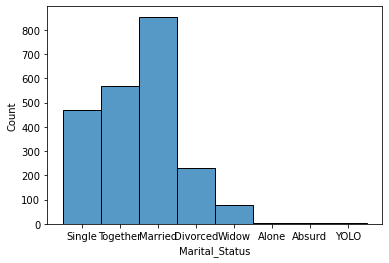

In [79]:
sns.histplot(data['Marital_Status'])

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

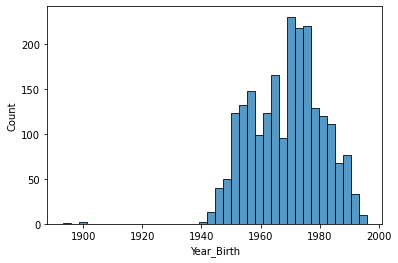

In [80]:
sns.histplot(data['Year_Birth'])

<AxesSubplot:xlabel='Year_Birth'>

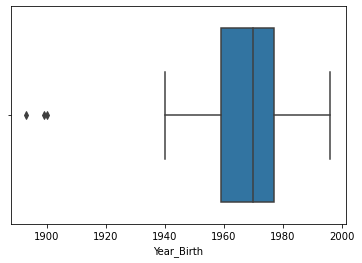

In [81]:
sns.boxplot(x=data['Year_Birth'])

<AxesSubplot:xlabel='Recency', ylabel='Count'>

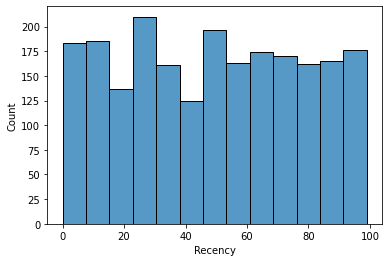

In [82]:
sns.histplot(data['Recency'])

<AxesSubplot:xlabel='Recency'>

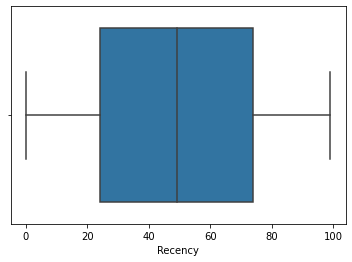

In [83]:
sns.boxplot(x=data['Recency'])

<AxesSubplot:xlabel='MntWines'>

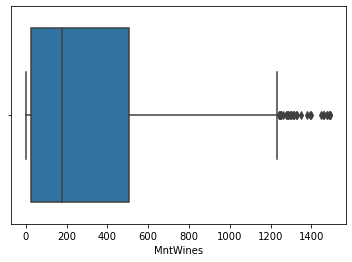

In [84]:
sns.boxplot(x=data['MntWines'])

In [85]:
Q1=data['MntWines'].quantile(0.25)
Q3=data['MntWines'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
#data = data[data['MntWines']< Upper_Whisker]

24.0
507.0
483.0
-700.5 1231.5


<AxesSubplot:xlabel='MntWines'>

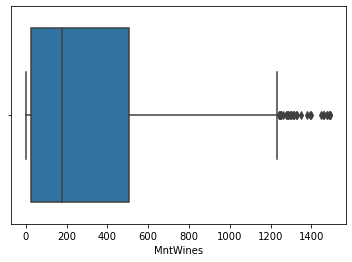

In [86]:
sns.boxplot(x=data['MntWines'])

In [87]:
Q1=data['MntMeatProducts'].quantile(0.25)
Q3=data['MntMeatProducts'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
#data = data[data['MntMeatProducts']< Upper_Whisker]

16.0
232.0
216.0
-308.0 556.0


In [88]:
Q1=data['MntFruits'].quantile(0.25)
Q3=data['MntFruits'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
#data = data[data['MntFruits']< Upper_Whisker]

2.0
33.0
31.0
-44.5 79.5


In [89]:
Q1=data['MntFishProducts'].quantile(0.25)
Q3=data['MntFishProducts'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
#data = data[data['MntFishProducts']< Upper_Whisker]

3.0
50.0
47.0
-67.5 120.5


In [90]:
Q1=data['MntSweetProducts'].quantile(0.25)
Q3=data['MntSweetProducts'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
#data = data[data['MntSweetProducts']< Upper_Whisker]

1.0
34.0
33.0
-48.5 83.5


In [91]:
Q1=data['MntGoldProds'].quantile(0.25)
Q3=data['MntGoldProds'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
#data = data[data['MntGoldProds']< Upper_Whisker]

9.0
56.25
47.25
-61.875 127.125


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2208 non-null   int64  
 1   Year_Birth           2208 non-null   int64  
 2   Education            2208 non-null   object 
 3   Marital_Status       2208 non-null   object 
 4   Income               2208 non-null   float64
 5   Kidhome              2208 non-null   int64  
 6   Teenhome             2208 non-null   int64  
 7   Dt_Customer          2208 non-null   object 
 8   Recency              2208 non-null   int64  
 9   MntWines             2208 non-null   int64  
 10  MntFruits            2208 non-null   int64  
 11  MntMeatProducts      2208 non-null   int64  
 12  MntFishProducts      2208 non-null   int64  
 13  MntSweetProducts     2208 non-null   int64  
 14  MntGoldProds         2208 non-null   int64  
 15  NumDealsPurchases    2208 non-null   i

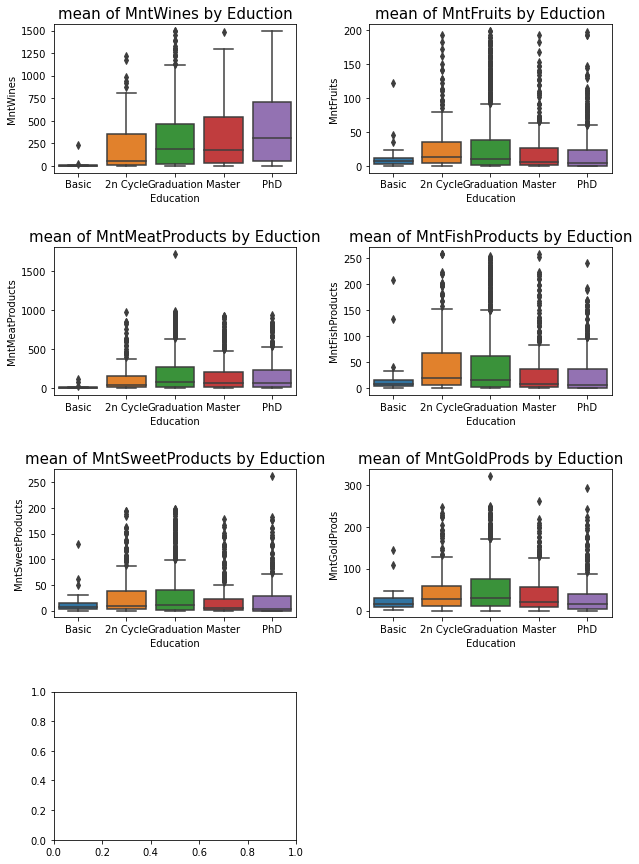

In [93]:
to_barplot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (10, 15))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.boxplot(data = data, x = 'Education', y = col, ax = ax,
                order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])
    ax.set_title(f'mean of {col} by Eduction', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    
axes[-1].axis('off')    
plt.show()              

In [94]:
purchases = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['total_purchase'] = data[purchases].sum(axis=1)

<AxesSubplot:xlabel='total_purchase'>

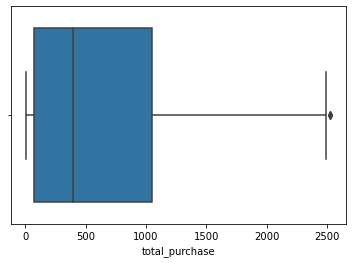

In [95]:
sns.boxplot(x=data['total_purchase'])

In [110]:
#corr_matrix = data.corr()
#f,ax = plt.subplots(figsize=(20,18))
#sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

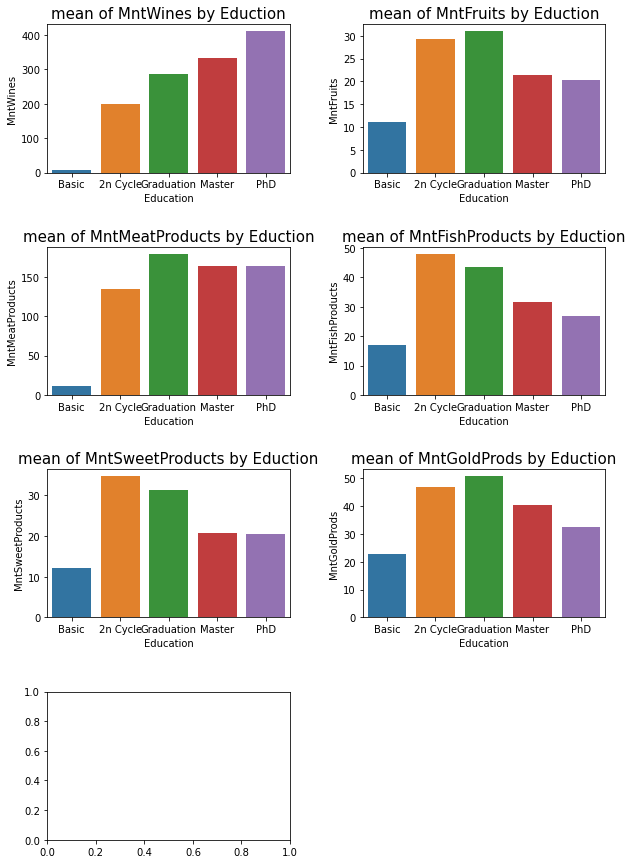

In [97]:
to_barplot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (10, 15))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data = data, x = 'Education', y = col, ax = ax,
                order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ci = None)
    ax.set_title(f'mean of {col} by Eduction', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    
axes[-1].axis('off')    
plt.show()

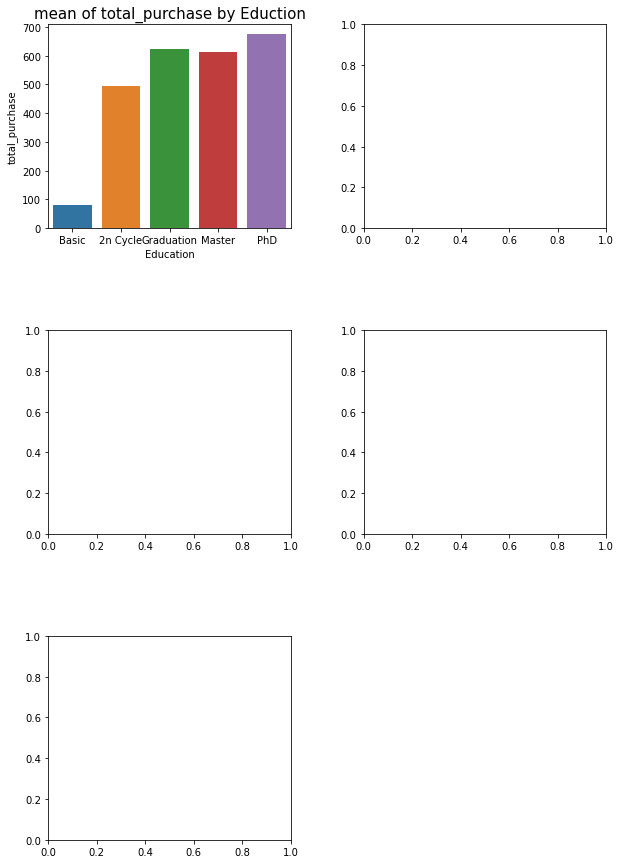

In [107]:
to_barplot = ['total_purchase']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (10, 15))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data = data, x = 'Education', y = col, ax = ax,
                order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ci = None)
    ax.set_title(f'mean of {col} by Eduction', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    
axes[-1].axis('off')    
plt.show()

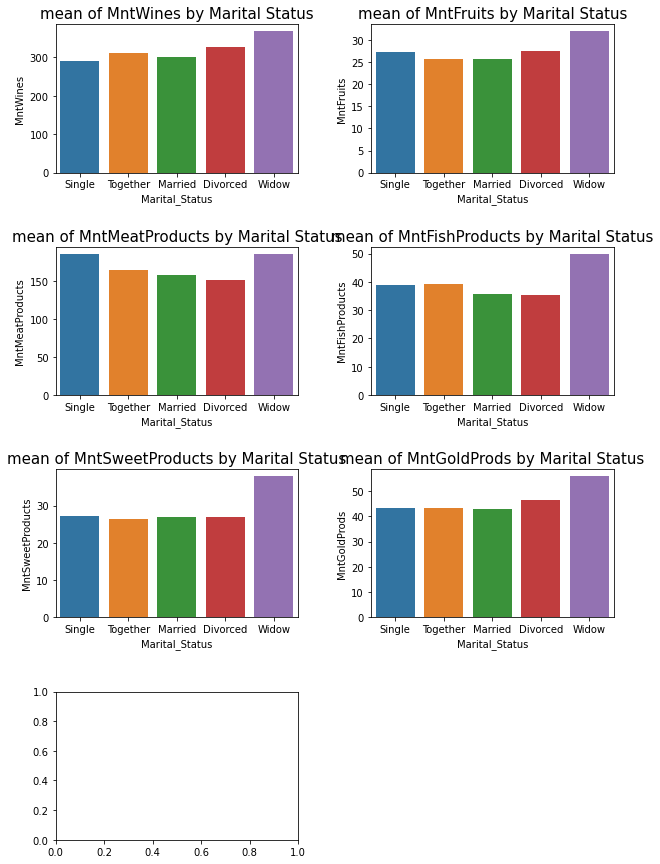

In [98]:
to_barplot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (10, 15))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data = data, x = 'Marital_Status', y = col, ax = ax,
                order = ['Single', 'Together', 'Married', 'Divorced', 'Widow'], ci = None)
    ax.set_title(f'mean of {col} by Marital Status', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    
axes[-1].axis('off')    
plt.show()

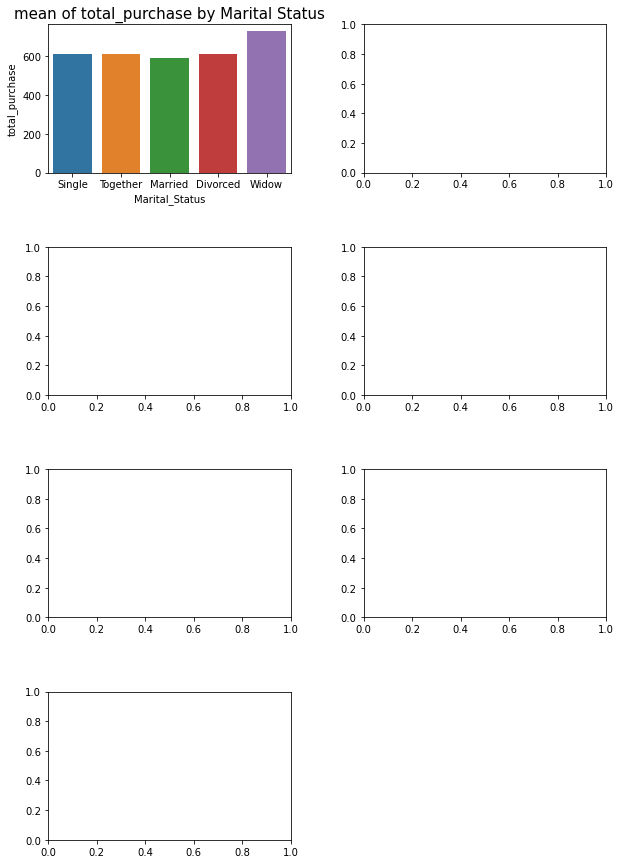

In [109]:
to_barplot = ['total_purchase']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (10, 15))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data = data, x = 'Marital_Status', y = col, ax = ax,
                order = ['Single', 'Together', 'Married', 'Divorced', 'Widow'], ci = None)
    ax.set_title(f'mean of {col} by Marital Status', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    
axes[-1].axis('off')    
plt.show()

<AxesSubplot:>

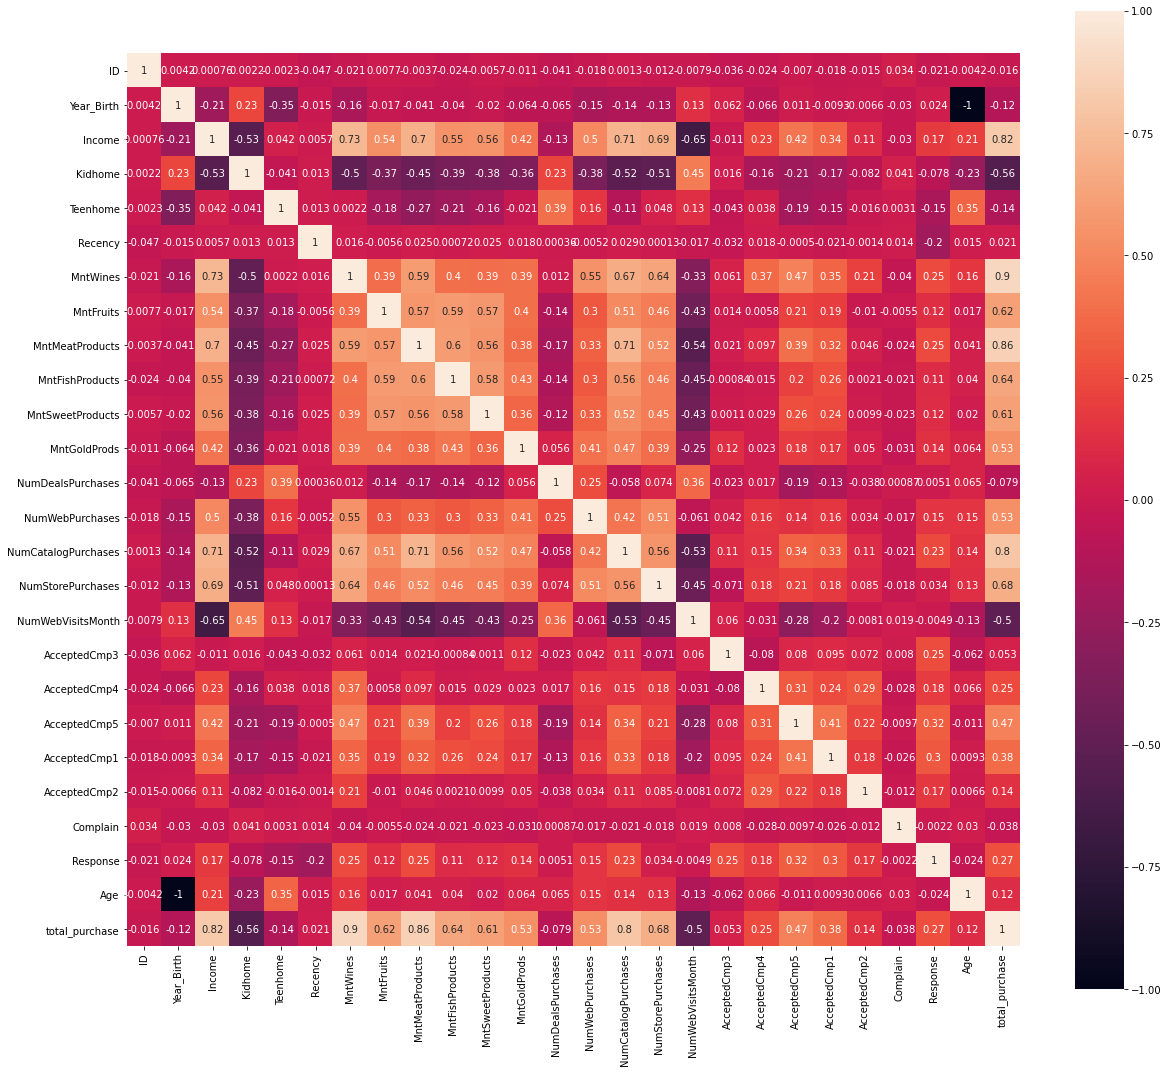

In [111]:
corr_matrix = data.corr()
f,ax = plt.subplots(figsize=(20,18))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)